# Data Merging

Data merging or integration is the process of combining data from multiple sources into a single, unified view. It ensures that data from diverse datasets is brought together in a meaningful way, removing redundancies and inconsistencies. This is a critical step in data preprocessing for data analysis and machine learning.

![alt text](<_- visual selection.png>)

![alt text](<_- visual selection (1).png>)

1. Types of Merging (Joins)

Merging ka matlab hota hai ke keys ki madad se rows ko match karke combine karna. Yeh alag-alag tarike hain:

    Inner Join:

Sirf un rows ko combine karta hai jahan dono datasets mein match ho.

Complexity: Match na hone wali rows remove ho jati hain.

    Outer Join:

Sab rows ko rakhta hai, aur jo match nahi hoti, unko NaN se fill karta hai.

Complexity: Missing values handle karni padti hain.

    Left Join:

Left dataset ki sari rows rakhta hai, aur jo match hoti hain right dataset se, unko combine karta hai.

Complexity: Ensure karna hota hai ke left dataset complete rahe.

    Right Join:

Right dataset ki sari rows rakhta hai, aur left dataset se matching rows ko combine karta hai.

    Cross Join:

Har row from dataset A ko har row from dataset B ke sath combine karta hai.

Complexity: Bohot large datasets me rows ka exponential growth ho jata hai.

2. Schema Matching (Columns Ko Match Karna)

    Jab tum alag-alag datasets ko combine karte ho, unka schema (column names ya structure) match nahi karta:
Example:

Dataset A: Employee_ID, Salary

Dataset B: Emp_ID, Bonus

Solution: Columns ko rename karo ya map karo (e.g., Employee_ID ko Emp_ID banado).

3. Inconsistent Data Ko Handle Karna

    Data Format Differences:

Example: Ek dataset me date format DD/MM/YYYY ho aur doosre me YYYY-MM-DD.

Solution: Dono datasets ko ek common format me convert karo.

    Unit Mismatches:

Example: Ek dataset ka income USD me ho aur doosra EUR me.

Solution: Conversion ka function lagao aur same unit me le aao.

    Duplicate Rows:

Example: Ek record multiple bar ho sakta hai.

Solution: .drop_duplicates() use karke duplicate rows remove karo.

4. Resolving Conflicts (Data Mismatch)

Kabhi kabhi datasets ke overlapping fields me conflicting values hoti hain.

Example:

Dataset A me product price $100 ho aur Dataset B me $90.

Solutions:

Priority rules: Decide karo kaunsa source zyada reliable hai.

Average: Numerical conflicts me average le lo.

Manual review: Critical conflicts ke liye human intervention zaroori hoti hai.

5. Handling Missing Data (NaN Values)

Outer joins ya mismatched keys ke baad missing data aa sakta hai.

Solutions:

Numerical columns me mean, median ya mode se fill karo.

Categorical columns me most frequent value (mode) use karo.

Missing rows ko drop kar do agar wo irrelevant hain.

6. Keys Ka Selection

Datasets ko match karne ke liye unique key chahiye hoti hai (e.g., ID, Order_Number).

Challenges:

Key unique honi chahiye.

Kabhi composite keys (e.g., Order_ID + Product_ID) banani padti hain.

7. Scalability Issues

Large datasets me merging bohot slow ho sakti hai.

Solution:

Use distributed computing tools like Apache Spark.

Chunks me merge karo ya subsets pe kaam karo.

8. Data Deduplication

Merge karne ke baad duplicate rows aa sakti hain.

Solution:

.drop_duplicates() use karo duplicate rows ko remove karne ke liye.

9. Data Transformation

Kabhi datasets ke columns directly match nahi karte:

Example: Ek dataset ka time zone UTC me ho aur doosra PST me.

Solution: Dono datasets ko ek common time zone me convert karo.

In [3]:
import pandas as pd

# DataFrame A
df_a = pd.DataFrame({
    "ID": [1, 2, 3, 4],
    "Name": ["Alice", "Bob", "Charlie", "David"],
    "Age": [25, 30, 35, 40]
})

# DataFrame B
df_b = pd.DataFrame({
    "ID": [3, 4, 5, 6],
    "Score": [85, 90, 95, 80],
    "City": ["NY", "LA", "SF", "Chicago"]
})

print("DataFrame A:\n", df_a)
print("\nDataFrame B:\n", df_b)


DataFrame A:
    ID     Name  Age
0   1    Alice   25
1   2      Bob   30
2   3  Charlie   35
3   4    David   40

DataFrame B:
    ID  Score     City
0   3     85       NY
1   4     90       LA
2   5     95       SF
3   6     80  Chicago


# 1. Inner Join


In [4]:
# Inner Join
inner_merge = pd.merge(df_a, df_b, on="ID", how="inner")
print("\nInner Join Result:\n", inner_merge)



Inner Join Result:
    ID     Name  Age  Score City
0   3  Charlie   35     85   NY
1   4    David   40     90   LA


# 2. Outer Join

In [5]:
# Outer Join
outer_merge = pd.merge(df_a, df_b, on="ID", how="outer")
print("\nOuter Join Result:\n", outer_merge)



Outer Join Result:
    ID     Name   Age  Score     City
0   1    Alice  25.0    NaN      NaN
1   2      Bob  30.0    NaN      NaN
2   3  Charlie  35.0   85.0       NY
3   4    David  40.0   90.0       LA
4   5      NaN   NaN   95.0       SF
5   6      NaN   NaN   80.0  Chicago


# 3. Left Join


In [6]:
# Left Join
left_merge = pd.merge(df_a, df_b, on="ID", how="left")
print("\nLeft Join Result:\n", left_merge)



Left Join Result:
    ID     Name  Age  Score City
0   1    Alice   25    NaN  NaN
1   2      Bob   30    NaN  NaN
2   3  Charlie   35   85.0   NY
3   4    David   40   90.0   LA


# 4. Right Join

In [7]:
# Right Join
right_merge = pd.merge(df_a, df_b, on="ID", how="right")
print("\nRight Join Result:\n", right_merge)



Right Join Result:
    ID     Name   Age  Score     City
0   3  Charlie  35.0     85       NY
1   4    David  40.0     90       LA
2   5      NaN   NaN     95       SF
3   6      NaN   NaN     80  Chicago


# 5. Cross Join

In [8]:
# Cross Join
df_a['key'] = 1  # Temporary key column
df_b['key'] = 1

cross_merge = pd.merge(df_a, df_b, on="key").drop("key", axis=1)
print("\nCross Join Result:\n", cross_merge)



Cross Join Result:
     ID_x     Name  Age  ID_y  Score     City
0      1    Alice   25     3     85       NY
1      1    Alice   25     4     90       LA
2      1    Alice   25     5     95       SF
3      1    Alice   25     6     80  Chicago
4      2      Bob   30     3     85       NY
5      2      Bob   30     4     90       LA
6      2      Bob   30     5     95       SF
7      2      Bob   30     6     80  Chicago
8      3  Charlie   35     3     85       NY
9      3  Charlie   35     4     90       LA
10     3  Charlie   35     5     95       SF
11     3  Charlie   35     6     80  Chicago
12     4    David   40     3     85       NY
13     4    David   40     4     90       LA
14     4    David   40     5     95       SF
15     4    David   40     6     80  Chicago


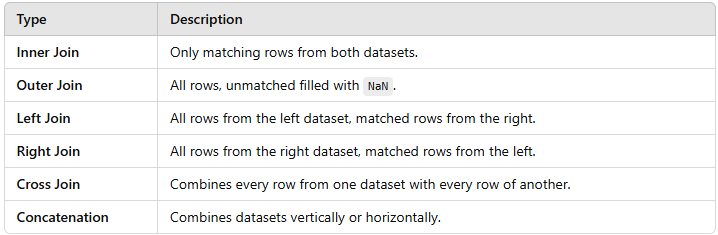

# Concatenation in Pandas: 

    1. What is Concatenation?

Concatenation combines two or more datasets either:

Vertically (rows): Stack datasets one below the other.

Horizontally (columns): Combine datasets side by side.

    2. Types of Concatenation

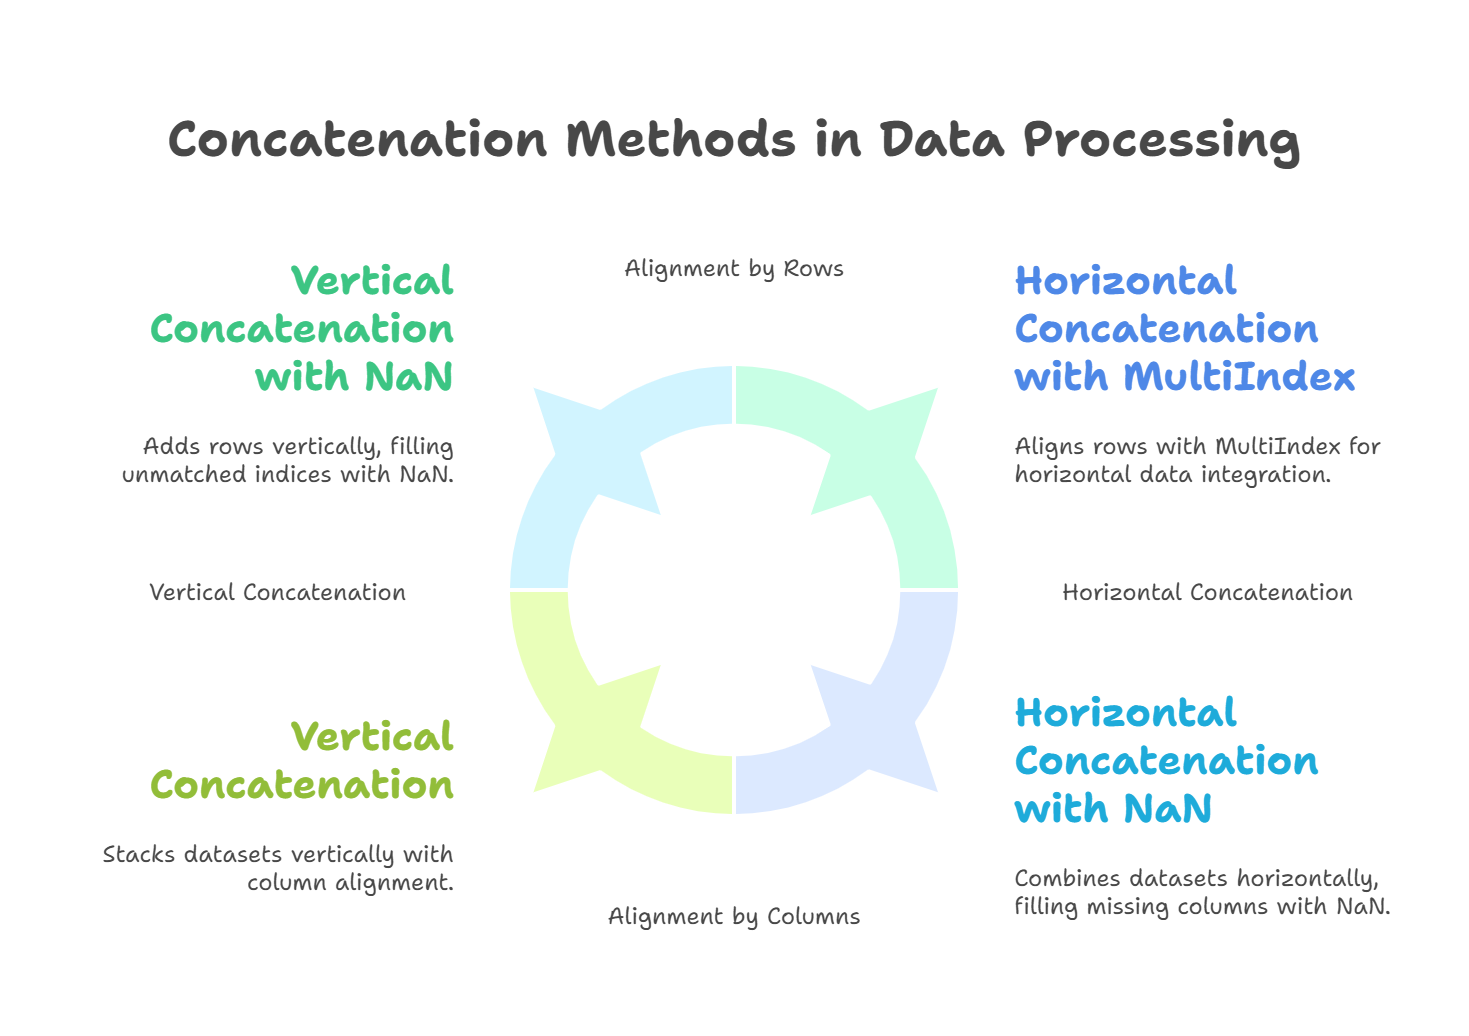

    Vertical Concatenation:


Rows are added below each other.

Columns must match; missing columns result in NaN.

    Horizontal Concatenation:

Columns are added side by side.

Rows are aligned by their index; unmatched rows result in NaN.

    Concatenation with Keys:

Adds a MultiIndex to identify rows from different datasets (e.g., Group A, Group B).

    Concatenation with Missing Data:

If rows or columns don’t align perfectly, missing values are filled with NaN.

    3. Complexities in Concatenation

    Duplicate Index:

If ignore_index=True is not used, duplicate indices can occur in vertical concatenation.

    Mismatched Columns/Rows:

If columns don’t match between datasets, the result will have missing values (NaN).

    Memory Issues:

Concatenating very large datasets can consume a lot of memory and processing time.

    Column Order:

Column order depends on the order of the first dataset.

    4. Key Parameters in pd.concat()

axis=0: Combine rows (vertical concatenation).

axis=1: Combine columns (horizontal concatenation).

ignore_index=True: Reset index after concatenation.

keys=[...]: Add group identifiers for MultiIndex.

    Use Cases of Concatenation

    Combining Monthly Data:

Stack rows from different months for yearly analysis.

    Adding New Features:

Add computed columns (e.g., predictions) to existing data.

    Handling Mismatched Datasets:

Combine datasets even if columns or rows don’t perfectly align.

# 1. Vertical Concatenation (Rows Combine Karna)

In [1]:
import pandas as pd

# Dataset A
df_a = pd.DataFrame({
    "ID": [1, 2, 3],
    "Name": ["Ali", "Ahmed", "Aisha"]
})

# Dataset B
df_b = pd.DataFrame({
    "ID": [4, 5, 6],
    "Name": ["Sara", "Umar", "Zara"]
})

# Vertical Concatenation
vertical_concat = pd.concat([df_a, df_b], axis=0, ignore_index=True)
print("Vertical Concatenation:\n", vertical_concat)


Vertical Concatenation:
    ID   Name
0   1    Ali
1   2  Ahmed
2   3  Aisha
3   4   Sara
4   5   Umar
5   6   Zara


# 2. Horizontal Concatenation (Columns Combine Karna)


In [2]:
# Dataset A
df_a = pd.DataFrame({
    "ID": [1, 2, 3],
    "Name": ["Ali", "Ahmed", "Aisha"]
})

# Dataset B
df_b = pd.DataFrame({
    "Age": [25, 30, 35],
    "City": ["Karachi", "Lahore", "Islamabad"]
})

# Horizontal Concatenation
horizontal_concat = pd.concat([df_a, df_b], axis=1)
print("Horizontal Concatenation:\n", horizontal_concat)


Horizontal Concatenation:
    ID   Name  Age       City
0   1    Ali   25    Karachi
1   2  Ahmed   30     Lahore
2   3  Aisha   35  Islamabad


# 3. Concatenation with Keys (MultiIndex Banana)


In [3]:
# Concatenation with Keys
concat_with_keys = pd.concat([df_a, df_b], keys=["Group A", "Group B"])
print("Concatenation with Keys:\n", concat_with_keys)


Concatenation with Keys:
             ID   Name   Age       City
Group A 0  1.0    Ali   NaN        NaN
        1  2.0  Ahmed   NaN        NaN
        2  3.0  Aisha   NaN        NaN
Group B 0  NaN    NaN  25.0    Karachi
        1  NaN    NaN  30.0     Lahore
        2  NaN    NaN  35.0  Islamabad


# 4. Handling Mismatched Columns


In [7]:
# Dataset C with additional column
df_c = pd.DataFrame({
    "ID": [7, 8],
    "Score": [85, 90]
})

# Vertical Concatenation with Missing Data
mismatched_concat = pd.concat([df_a, df_c], axis=0)
print("Mismatched Columns Concatenation:\n", mismatched_concat)


Mismatched Columns Concatenation:
    ID   Name  Score
0   1    Ali    NaN
1   2  Ahmed    NaN
2   3  Aisha    NaN
0   7    NaN   85.0
1   8    NaN   90.0


# 5. Index Alignment Issue in Horizontal Concatenation



In [8]:
# Dataset with Different Index
df_d = pd.DataFrame({
    "Age": [25, 30],
    "City": ["Karachi", "Lahore"]
}, index=[1, 2])

# Horizontal Concatenation with Index Alignment
index_concat = pd.concat([df_a, df_d], axis=1)
print("Index Alignment Concatenation:\n", index_concat)


Index Alignment Concatenation:
    ID   Name   Age     City
0   1    Ali   NaN      NaN
1   2  Ahmed  25.0  Karachi
2   3  Aisha  30.0   Lahore


# 6. Reset Index for Proper Alignment


In [9]:
# Reset Index Before Concatenation
df_d_reset = df_d.reset_index(drop=True)
aligned_concat = pd.concat([df_a, df_d_reset], axis=1)
print("Reset Index Concatenation:\n", aligned_concat)


Reset Index Concatenation:
    ID   Name   Age     City
0   1    Ali  25.0  Karachi
1   2  Ahmed  30.0   Lahore
2   3  Aisha   NaN      NaN


# 7. Add Metadata to Datasets Using Keys


In [10]:
# Add Keys for Metadata
metadata_concat = pd.concat([df_a, df_b], keys=["Dataset 1", "Dataset 2"])
print("Concatenation with Metadata:\n", metadata_concat)


Concatenation with Metadata:
               ID   Name   Age       City
Dataset 1 0  1.0    Ali   NaN        NaN
          1  2.0  Ahmed   NaN        NaN
          2  3.0  Aisha   NaN        NaN
Dataset 2 0  NaN    NaN  25.0    Karachi
          1  NaN    NaN  30.0     Lahore
          2  NaN    NaN  35.0  Islamabad


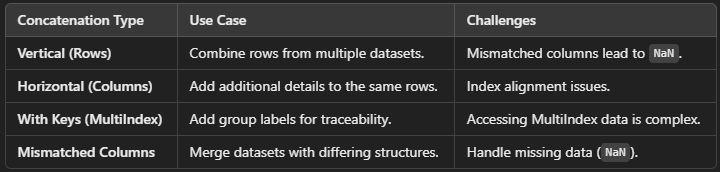

![alt text](<_- visual selection (3).png>)